In [31]:
import tweepy
import sys
import json
import time
import pandas as pd
import requests
from requests_oauthlib import OAuth1
import datetime as dt
import importlib
import matplotlib.pyplot as plt

import structure_tweets

In [26]:
users = pd.read_csv('seed_users.csv').users.values

In [64]:
with open('data/seed_tweets/seed_tweets_200501.json') as json_data:
    stream = json_data.readlines()
stream = structure_tweets.structure_results(stream)

In [65]:
stream.head()

,id,screen_name,text,rt_from_screen_name,qt_from_screen_name,qt_status,in_reply_to_screen_name,in_reply_to_status,mentions,datetime
0,1256012150050603008,paulderby11,Who wants to pay for the EU debts? Corbyn? Bre...,OhBrokenBritain,None,None,None,NaN,{},2020-05-01 00:06:46
1,1256014203879591941,maca_13_9,We want OUT. They want us IN to keep taking ou...,OhBrokenBritain,None,None,None,NaN,{},2020-05-01 00:14:56
2,1256038046421733377,AbuWudu,@OhBrokenBritain @theUKtoday @10DowningStreet ...,None,None,None,OhBrokenBritain,1.255915e+18,"{10DowningStreet, theUKtoday, OhBrokenBritain}",2020-05-01 01:49:40
3,1256039782532222977,JonnyVamExplore,Who wants to pay for the EU debts? Corbyn? Bre...,OhBrokenBritain,None,None,None,NaN,{},2020-05-01 01:56:34
4,1256043493769830400,_ChelseaProject,@TradBritGroup Quisling,None,None,None,TradBritGroup,1.254033e+18,{TradBritGroup},2020-05-01 02:11:19


In [78]:
print("Tweets collected: ",len(stream))
print("Tweets by seed users: ",len(stream[stream.screen_name.isin(users)]))
print("Retweets: ",len(stream[stream.rt_from_screen_name.notna()]))
print("Quoted: ",len(stream[(stream.qt_from_screen_name.notna()) & stream.rt_from_screen_name.isna()]))
print("Replies: ",len(stream[stream.in_reply_to_screen_name.notna()]))

Tweets collected:  503
Tweets by seed users:  28
Retweets:  380
Quoted:  19
Replies:  98


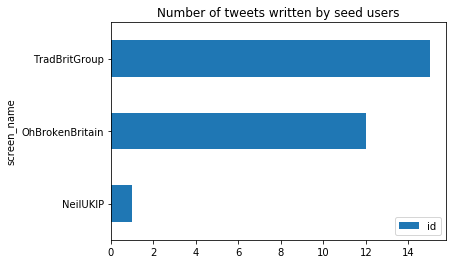

In [79]:
(stream[stream.screen_name.isin(users)][['screen_name','id']]
                            .groupby('screen_name')
                            .count()
                            .plot(kind='barh', title='Number of tweets written by seed users'))

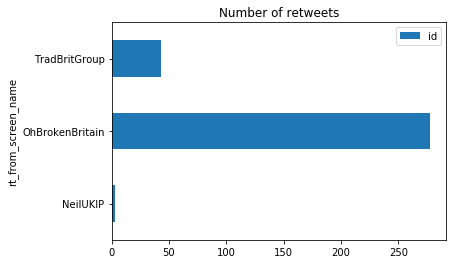

In [67]:
(stream[stream.rt_from_screen_name.isin(users)][['rt_from_screen_name','id']]
                            .groupby('rt_from_screen_name')
                            .count()
                            .plot(kind='barh', title='Number of retweets'))

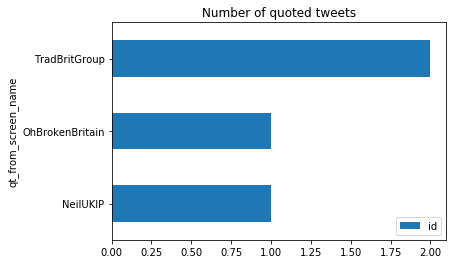

In [70]:
(stream[(stream.qt_from_screen_name.isin(users)) & (stream.rt_from_screen_name.isna())][['qt_from_screen_name','id']]
                            .groupby('qt_from_screen_name')
                            .count()
                            .plot(kind='barh', title='Number of quoted tweets'))

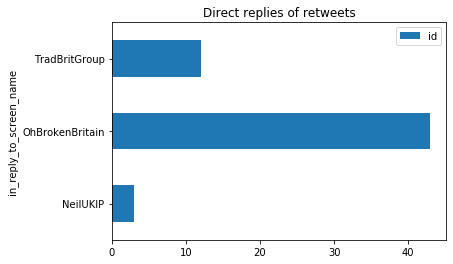

In [73]:
(stream[stream.in_reply_to_screen_name.isin(users)]
                            [['in_reply_to_screen_name','id']]
                            .groupby('in_reply_to_screen_name')
                            .count()
                            .plot(kind='barh', title='Direct replies of retweets'))